In [2]:
%matplotlib inline
import csv

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.naive_bayes import MultinomialNB

%load_ext autoreload 
%autoreload 2

## Generate Bag of Words from Dataset

data from: https://www.kaggle.com/uciml/sms-spam-collection-dataset/data

In [21]:
classes = ["spam", "ham"]

def load_spam_data():

    # Data File
    file = "data/spam.csv"

    # Lists to store all word frequencies from messages
    # used to find top words for each class
    content_spam = {}
    content_ham = {}

    # Lists for each message and corresponding label
    messages = []
    y = []

    # open the file for processing as a CSV
    with open(file, 'r') as f:
        reader = csv.reader(f)

        for i, row in enumerate(reader):
            if i == 0:
                continue

            # split the string and remove all non alpha characters (or ')
            words = [''.join(c for c in word if c.isalpha() or c == "'") for word in row[1].lower().split()]

            # Add and count words for spam and ham classes
            content = content_spam if row[0] == "spam" else content_ham
            for w in words:
                if len(w) > 3:
                    if w in content:
                        content[w] += 1
                    else:
                        content[w] = 1

            # Append full messages
            messages.append(" ".join(words))
            y.append(classes.index(row[0]))

    # sort each each word based on value count
    sorted_X_spam = sorted(content_spam, key=content_spam.get, reverse=True)
    sorted_X_ham = sorted(content_ham, key=content_ham.get, reverse=True)

    # populate the bag-of-words with top 50 words from each class (and remove duplicates)
    bow = []
    for i in range(50):
        if sorted_X_spam[i] not in bow:
            bow.append(sorted_X_spam[i])
        if sorted_X_ham[i] not in bow:
            bow.append(sorted_X_ham[i])


    return bow, messages, np.array(y)

In [4]:
bow, messages, y = load_spam_data()

## Convert Messages into Word Frequency Vectors

In [5]:
X = CountVectorizer(vocabulary=bow).fit_transform(messages)

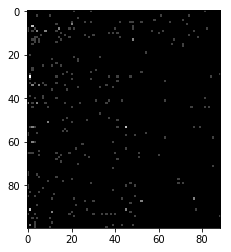

In [15]:
plt.imshow(X[:100].toarray(), cmap="gray")

In [5]:
i = 9
print (messages[i])
print (X[i])

had your mobile  months or more u r entitled to update to the latest colour mobiles with camera for free call the mobile update co free on 
  (0, 0)	1
  (0, 2)	1
  (0, 4)	2
  (0, 8)	2
  (0, 13)	1
  (0, 57)	1
  (0, 62)	1
  (0, 76)	1


## Train and Test Classifier

### Naive Bayes

Probability based classification using Bayes Theorem

* Bayes Theorem
    * `P(Y|X) = P(X|Y) * P(Y) / P(X)`
    * `posterior = prior * likelihood / evidence`
    
    
* Naive Bayes
    * Assumes conditional independence between features
    * Even though this isn't always the case...
    
    
* Conditional Independence:
    * If X, Y, Z are variables, and P(X|Y, Z) = P(X|Y)
    * Then Y and Z are conditionally independent since Z didn't affect the probability.
    
    
* Bayesian Belief Networks
    * Use when strong depedence between states

### Naive Bayes Classifier

In [11]:
%%latex
\[c\ =\ argmax_{x \in \{1,...,K\}}\;  p(C_k) \prod_{i=1}^{n} p(x_i\ |\ C_k)\]

<IPython.core.display.Latex object>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95692749461593685

In [9]:
p = clf.predict(X[9])
print (p, y[9])

[0] 0


In [16]:
score = cross_val_score(clf, X, y, cv=3)
print (score)

NameError: name 'clf' is not defined

In [19]:
np.where(y==1)

(array([], dtype=int64),)

In [20]:
y.shape

AttributeError: 'list' object has no attribute 'shape'